# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 627


['barrow',
 'krasnoselkup',
 'qaanaaq',
 'taolanaro',
 'rikitea',
 'vaitupu',
 'sola',
 'amderma',
 'pacific grove',
 'ushuaia',
 'punta arenas',
 'dabhol',
 'horki',
 'escanaba',
 'maniitsoq',
 'mys shmidta',
 'severo-kurilsk',
 'balkhash',
 'glen allen',
 'padang',
 'tiksi',
 'port lincoln',
 'nizhniy kuranakh',
 'sur',
 'jamestown',
 'cape town',
 'hasaki',
 'mataura',
 'guajara-mirim',
 'pevek',
 'fianarantsoa',
 'kondinskoye',
 'ribeira grande',
 'esperance',
 'katsuura',
 'san patricio',
 'cochrane',
 'itarema',
 'attawapiskat',
 'chokurdakh',
 'new norfolk',
 'dikson',
 'nalut',
 'shimoda',
 'bredasdorp',
 'nemuro',
 'bhopal',
 'illoqqortoormiut',
 'belushya guba',
 'hobart',
 'torbay',
 'tawkar',
 'vila franca do campo',
 'mindelo',
 'ancud',
 'zaterechnyy',
 'high level',
 'albany',
 'islahiye',
 'champerico',
 'launceston',
 'urucara',
 'marcona',
 'wadi maliz',
 'hilo',
 'hithadhoo',
 'cervo',
 'tasiilaq',
 'constitucion',
 'ozgon',
 'marienburg',
 'komsomolskiy',
 'geraldto

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | krasnoselkup
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | sola
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | pacific grove
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | dabhol
Processing Record 13 of Set 1 | horki
Processing Record 14 of Set 1 | escanaba
Processing Record 15 of Set 1 | maniitsoq
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | balkhash
Processing Record 19 of Set 1 | glen allen
Processing Record 20 of Set 1 | padang
Processin

Processing Record 35 of Set 4 | kavarna
Processing Record 36 of Set 4 | westport
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | codrington
Processing Record 39 of Set 4 | bonito oriental
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | adrar
Processing Record 42 of Set 4 | mareeba
Processing Record 43 of Set 4 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 44 of Set 4 | san blas
Processing Record 45 of Set 4 | meyungs
City not found. Skipping...
Processing Record 46 of Set 4 | shakawe
Processing Record 47 of Set 4 | ullapool
Processing Record 48 of Set 4 | tera
Processing Record 49 of Set 4 | puerto ayora
Processing Record 0 of Set 5 | baruun-urt
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | iskateley
Processing Record 3 of Set 5 | faanui
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | chara
Processing Record 6 of Set 5 | vammala
Processing Record 7 of Set 5 

Processing Record 26 of Set 8 | margate
Processing Record 27 of Set 8 | marv dasht
City not found. Skipping...
Processing Record 28 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 29 of Set 8 | mulchen
Processing Record 30 of Set 8 | kungurtug
Processing Record 31 of Set 8 | strezhevoy
Processing Record 32 of Set 8 | nioro
Processing Record 33 of Set 8 | yanan
City not found. Skipping...
Processing Record 34 of Set 8 | pemberton
Processing Record 35 of Set 8 | shingu
Processing Record 36 of Set 8 | tukrah
Processing Record 37 of Set 8 | dvinskoy
Processing Record 38 of Set 8 | vung tau
Processing Record 39 of Set 8 | yingcheng
Processing Record 40 of Set 8 | meulaboh
Processing Record 41 of Set 8 | rockingham
Processing Record 42 of Set 8 | kita
Processing Record 43 of Set 8 | forestville
Processing Record 44 of Set 8 | la rioja
Processing Record 45 of Set 8 | shangzhi
Processing Record 46 of Set 8 | bonavista
Processing Record 47 of Set 8 | koumac
Processing Rec

Processing Record 11 of Set 12 | prince rupert
Processing Record 12 of Set 12 | college
Processing Record 13 of Set 12 | rosetta
Processing Record 14 of Set 12 | villarrica
Processing Record 15 of Set 12 | esna
Processing Record 16 of Set 12 | hobyo
Processing Record 17 of Set 12 | rumonge
Processing Record 18 of Set 12 | morant bay
Processing Record 19 of Set 12 | whitehorse
Processing Record 20 of Set 12 | marrakesh
Processing Record 21 of Set 12 | ostrovnoy
Processing Record 22 of Set 12 | marystown
Processing Record 23 of Set 12 | patamundai
Processing Record 24 of Set 12 | kologriv
Processing Record 25 of Set 12 | slave lake
Processing Record 26 of Set 12 | kuche
City not found. Skipping...
Processing Record 27 of Set 12 | qafsah
City not found. Skipping...
Processing Record 28 of Set 12 | deer lake
Processing Record 29 of Set 12 | jardim
Processing Record 30 of Set 12 | bari
Processing Record 31 of Set 12 | syracuse
Processing Record 32 of Set 12 | serov
Processing Record 33 of S

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,-27.99,76,0,2.06,US,1675632145
1,krasnoselkup,65.7000,82.4667,-21.88,100,91,1.82,RU,1675632150
2,qaanaaq,77.4840,-69.3632,-18.70,59,2,3.81,GL,1675632151
3,rikitea,-23.1203,-134.9692,26.02,74,5,7.05,PF,1675632152
4,sola,-13.8833,167.5500,27.88,78,100,8.79,VU,1675632153


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-27.99,76,0,2.06,US,1675632145
1,krasnoselkup,65.7000,82.4667,-21.88,100,91,1.82,RU,1675632150
2,qaanaaq,77.4840,-69.3632,-18.70,59,2,3.81,GL,1675632151
3,rikitea,-23.1203,-134.9692,26.02,74,5,7.05,PF,1675632152
4,sola,-13.8833,167.5500,27.88,78,100,8.79,VU,1675632153


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

1675632145


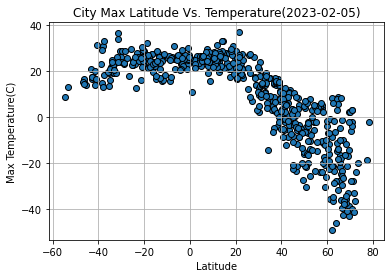

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",edgecolors="black")
# Incorporate the other graph properties
today = time.strftime("%Y-%m-%d")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Max Latitude Vs. Temperature({today})")
# Save the figure
plt.savefig("output_data/Fig1.png")
print(date)
# Show plot
plt.show()

#### Latitude Vs. Humidity

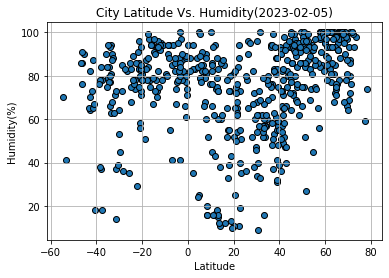

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",edgecolors="black")

# Incorporate the other graph properties
today = time.strftime("%Y-%m-%d")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude Vs. Humidity({today})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

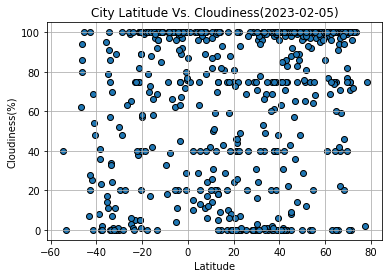

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",edgecolors="black")

# Incorporate the other graph properties
today = time.strftime("%Y-%m-%d")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude Vs. Cloudiness({today})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

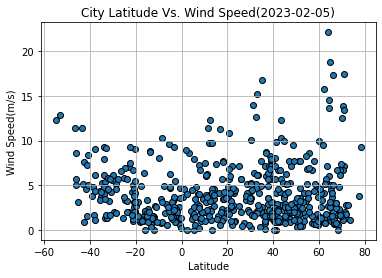

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",edgecolors="black")

# Incorporate the other graph properties
today = time.strftime("%Y-%m-%d")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title(f"City Latitude Vs. Wind Speed({today})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def linearregression_plot(x_value,y_value,x_label,y_label,line_coordinates,hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    today = time.strftime("%Y-%m-%d")
    fig1, ax1 = plt.subplots(figsize=(8,6))
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq, line_coordinates, fontsize=20, color="red")
    plt.title(f"City {x_label} Vs {y_label} ({today}) in {hemisphere}ern Hemisphere")
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    print(f"The r-value is: {rvalue}")
    plt.show()
    

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-27.99,76,0,2.06,US,1675632145
1,krasnoselkup,65.7000,82.4667,-21.88,100,91,1.82,RU,1675632150
2,qaanaaq,77.4840,-69.3632,-18.70,59,2,3.81,GL,1675632151
5,pacific grove,36.6177,-121.9166,14.38,76,75,7.20,US,1675632154
8,dabhol,17.6000,73.1667,21.66,55,10,2.32,IN,1675631968


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rikitea,-23.1203,-134.9692,26.02,74,5,7.05,PF,1675632152
4,sola,-13.8833,167.5500,27.88,78,100,8.79,VU,1675632153
6,ushuaia,-54.8000,-68.3000,8.79,70,40,12.35,AR,1675632155
7,punta arenas,-53.1500,-70.9167,13.06,41,0,12.86,CL,1675631866
15,padang,-0.9492,100.3543,23.03,77,100,1.28,ID,1675632162


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8435351725285991


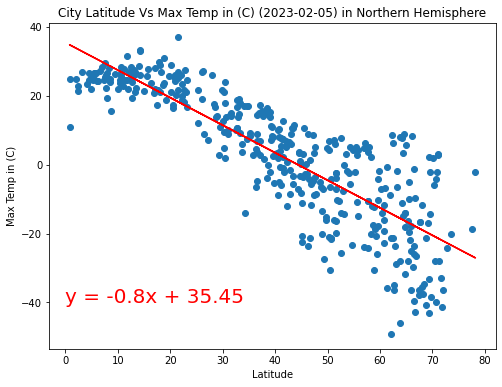

In [90]:
# Linear regression on Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Max Temp"]
x_label="Latitude"
y_label="Max Temp in (C)"
line_coordinates=(0,-40)
hemisphere="North"
linearregression_plot(x_value,y_value,x_label,y_label,line_coordinates,hemisphere)

The r-value is: 0.39431204034192496


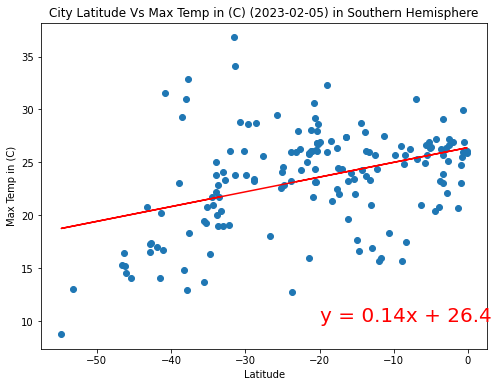

In [91]:
# Linear regression on Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Max Temp"]
x_label="Latitude"
y_label="Max Temp in (C)"
line_coordinates=(-20,10)
hemisphere="South"
linearregression_plot(x_value,y_value,x_label,y_label,line_coordinates,hemisphere)

**Discussion about the linear relationship:** For northern hemisphere, the relationship between Latitude and Max Temperature is negatively correlated;as latitude increases,Temperature decreases. This implies Temperature decreases as we move away from equator. The r value is also nearly 1.
For southern hemipshere, the relation between Latitude and Max Temperature is very slight positively correlated; as latitude decreases(moving towards equator- as southern hemisphere has negative Latitude), temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.46790320055617873


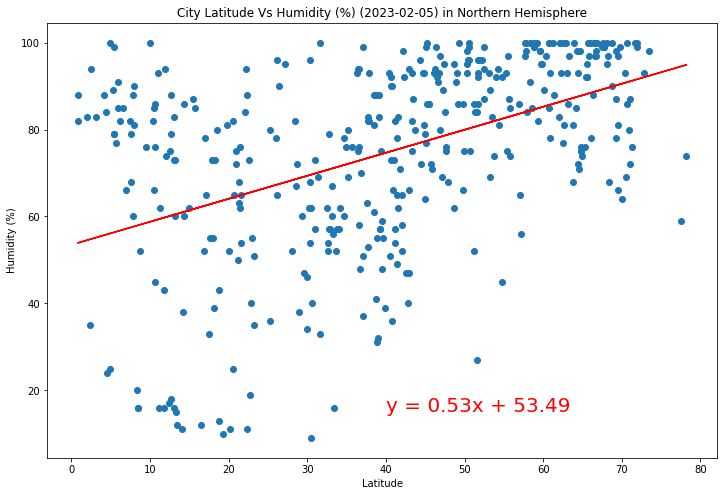

In [80]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Humidity"]
x_label="Latitude"
y_label="Humidity (%)"
line_coordinates=(40,15)
hemisphere="North"
linearregression_plot(x_value,y_value,x_label,y_label,line_coordinates,hemisphere)

The r-value is: 0.2836711182774116


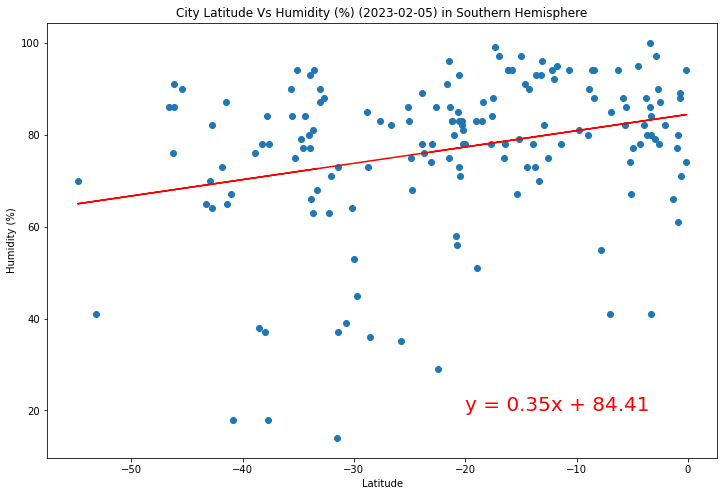

In [82]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Humidity"]
x_label="Latitude"
y_label="Humidity (%)"
line_coordinates=(-20,20)
hemisphere="South"
linearregression_plot(x_value,y_value,x_label,y_label,line_coordinates,hemisphere)

**Discussion about the linear relationship:** The correlation between Humidity and Latitude across Both hemispheres are really small. For northern hemisphere for some very high latitudes, there is a high humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3034053407113709


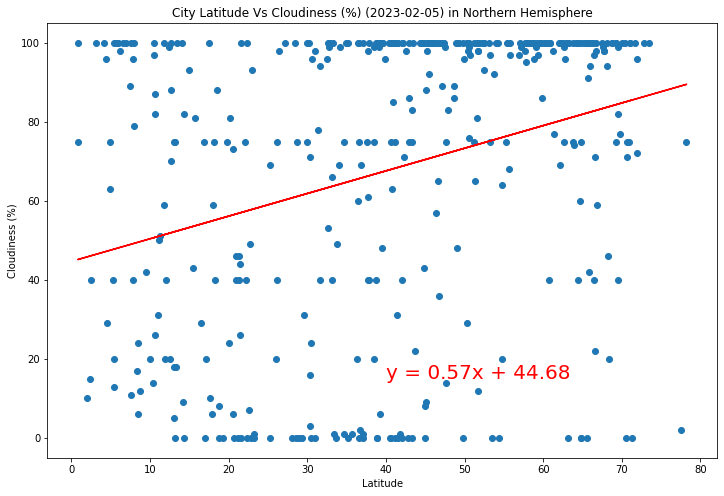

In [83]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness (%)"
line_coordinates=(40,15)
hemisphere="North"
linearregression_plot(x_value,y_value,x_label,y_label,line_coordinates,hemisphere)

The r-value is: 0.3781362882079994


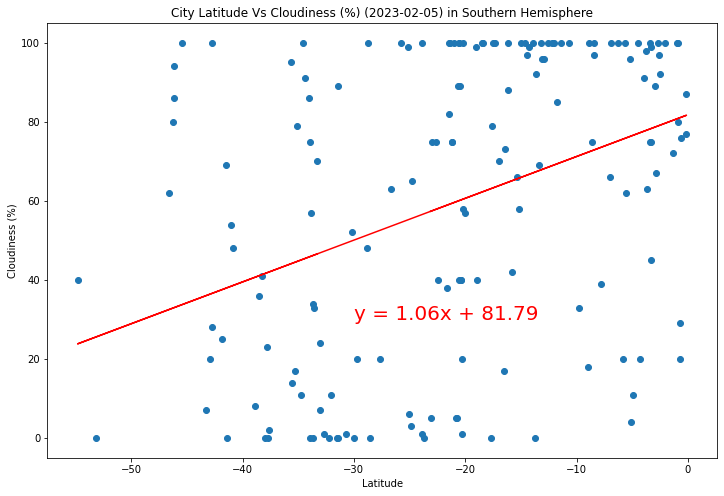

In [84]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness (%)"
line_coordinates=(-30,30)
hemisphere="South"
linearregression_plot(x_value,y_value,x_label,y_label,line_coordinates,hemisphere)

**Discussion about the linear relationship:** there is nearly zero correlation between Cloudiness and Latitude across both hemispheres since the scatter plot has values distributed across the graph

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02646669822261862


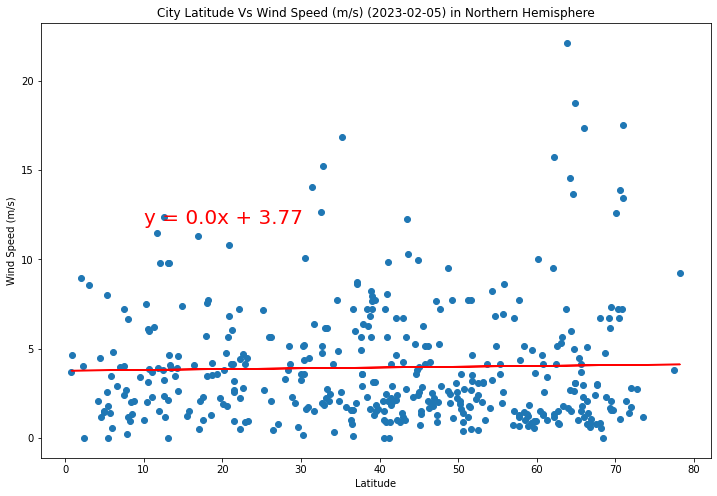

In [85]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed (m/s)"
line_coordinates=(10,12)
hemisphere="North"
linearregression_plot(x_value,y_value,x_label,y_label,line_coordinates,hemisphere)

The r-value is: 0.02646669822261862


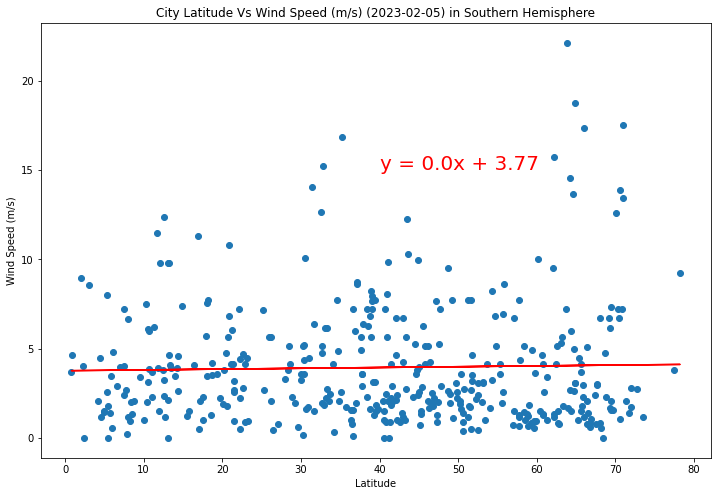

In [86]:
# Southern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed (m/s)"
line_coordinates=(40,15)
hemisphere="South"
linearregression_plot(x_value,y_value,x_label,y_label,line_coordinates,hemisphere)

**Discussion about the linear relationship:** No relationship can be defined between Latitude and Windspeed, Hence both of them have distributed values across the scatter plot